<a href="https://colab.research.google.com/github/AliceKitchkin/Unsupervised-Machine-Learning/blob/main/AirlinePassengerSatisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Bibliotheken und Daten Import

---

In [551]:
# handle table-like data and matrices
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# preprocessing
from sklearn.preprocessing import StandardScaler

# pca
from sklearn.decomposition import PCA

# clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering

# evaluations
from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [552]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [553]:
data_raw = pd.read_csv("/content/drive/MyDrive/Bachelorarbeit/CSV/Airline Passenger Satisfaction/AirlinePassengerData_Test.csv")
data = data_raw.copy()

#2. Aufbereitung

---

##2.1 First Look

In [554]:
data_raw.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [555]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [556]:
data_raw.shape

(25976, 25)

In [557]:
data_raw.describe(include = 'all')

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,25976.000000,25976.000000,25976,25976,25976.000000,25976,25976,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000,25976
unique,NaN,NaN,2,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,NaN,NaN,13172,21177,NaN,18038,12495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14573
mean,12987.500000,65005.657992,NaN,NaN,39.620958,NaN,NaN,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857,NaN
std,7498.769632,37611.526647,NaN,NaN,15.135685,NaN,NaN,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539,NaN
min,0.000000,17.000000,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,NaN
25%,6493.750000,32170.500000,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000,NaN
50%,12987.500000,65319.500000,NaN,NaN,40.000000,NaN,NaN,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000,NaN
75%,19481.250000,97584.250000,NaN,NaN,51.000000,NaN,NaN,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000,NaN


##2.2 Missing Values

Missingno is a Python library that provides the ability to understand the distribution of missing values through informative visualizations.

In [558]:
print(data_raw.isna().sum())

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


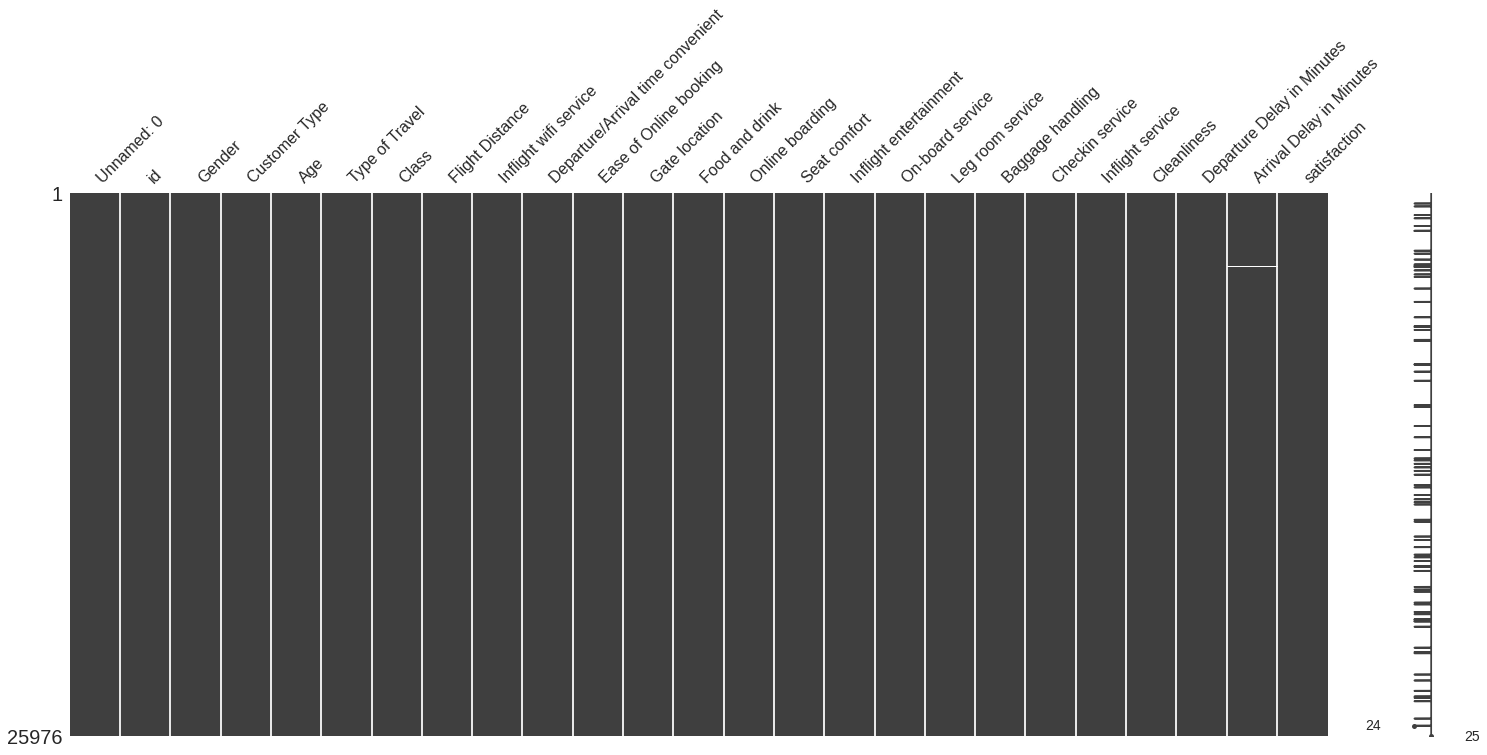

In [559]:
msno.matrix(data_raw)

Die Spalte "Arrival Delay in Minutes" (Ankunftsverspätung in Minuten) hat 83 fehlende Werte.

In [560]:
#Zeilen mit fehlenden Werten löschen
data = data.dropna()
data.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

##2.3 Spaltenaufarbeitung

In [561]:
data['GesamtzufriedenheitSummiert'] = data['Inflight wifi service'] + data['Departure/Arrival time convenient'] + data['Ease of Online booking'] + data['Gate location'] + data['Food and drink'] + data['Online boarding'] + data['Seat comfort'] + data['Inflight entertainment'] + data['On-board service'] + data['Leg room service'] + data['Baggage handling'] + data['Checkin service'] + data['Inflight service'] + data['Cleanliness']

In [562]:
#Neue Spalte "Flugverspatung in Minuten" hinzufügen
#Die im Flug aufgeholte Zeit in Minuten ist positiv
#Die im Flug noch zusätzliche Verspätung ist negativ
data['FlugverspatungInMinuten'] = data['Arrival Delay in Minutes'] - data['Departure Delay in Minutes']

In [563]:
data['IstPuenktlich'] = np.where((data['Arrival Delay in Minutes'] - data['Departure Delay in Minutes'])==0, 1, 0)

In [564]:
#Erste Spalte "Unnamed: 0" löschen, ist bloß ein Zeilenzähler
data = data.drop("Unnamed: 0", axis=1)

In [565]:
data = data.drop("id", axis=1)

In [566]:
data['IstKind'] = np.where(data.Age<13 , 1, 0)

In [567]:
data['IstErwachsener'] = np.where(data.Age>=18 , 1, 0)

In [568]:
data['IstTeenager'] = np.where((data.Age>12) & (data.Age<18), 1, 0)

In [569]:
#umbenennen
data = data.rename({"id":"id", "Gender":"Geschlecht", "Customer Type":"PassagierTyp", "Age":"Alter", "Type of Travel":"Reisetyp", "Class":"Klasse", "Flight Distance":"Flugdistanz", "Inflight wifi service":"InternetAufFlug", "Departure/Arrival time convenient":"Abreisezeit_Ankunftszeit_Bequemlichkeit", "Ease of Online booking":"LeichtigkeitDerOnlineBuchung", "Gate location":"StandortGate", "Food and drink":"EssenTrinken", "Online boarding":"OnlineBoarding", "Seat comfort":"Sitzkomfort", "Inflight entertainment":"Flugentertainment", "On-board service":"OnboradingService", "Leg room service":"Beinfreiheit", "Baggage handling":"Gepaeckumgang", "Checkin service":"CheckinService", "Inflight service":"Flugservice", "Cleanliness":"Sauberkeit", "Departure Delay in Minutes":"AbflugverspaetungInMinuten", "Arrival Delay in Minutes":"GesamtverspaetungInMinuten", "satisfaction":"IstZufrieden"}, axis=1)

In [570]:
data.head()

,Geschlecht,PassagierTyp,Alter,Reisetyp,Klasse,Flugdistanz,InternetAufFlug,Abreisezeit_Ankunftszeit_Bequemlichkeit,LeichtigkeitDerOnlineBuchung,StandortGate,EssenTrinken,OnlineBoarding,Sitzkomfort,Flugentertainment,OnboradingService,Beinfreiheit,Gepaeckumgang,CheckinService,Flugservice,Sauberkeit,AbflugverspaetungInMinuten,GesamtverspaetungInMinuten,IstZufrieden,GesamtzufriedenheitSummiert,FlugverspatungInMinuten,IstPuenktlich,IstKind,IstErwachsener,IstTeenager
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied,58,-6.0,0,0,1,0
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied,48,0.0,1,0,1,0
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied,30,0.0,1,0,1,0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied,25,6.0,0,0,1,0
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied,37,20.0,0,0,1,0


##2.4 Check for Unique Values

In [571]:
for col in data:
    print(data[col].unique())

['Female' 'Male']
['Loyal Customer' 'disloyal Customer']
[52 36 20 44 49 16 77 43 47 46 33 60 50 31 55 25 30 62 24 22 51 56 41 53
 12 39 32 40 42 28 59 58 27 67 70 66 19 69 35 54 26 61 21 37 45 38  7 34
 17 15 48 13 11 29  8 18 23 65 57 80 64  9 14 68 10 79 63 73 74 71 72 76
 78 75 85]
['Business travel' 'Personal Travel']
['Eco' 'Business' 'Eco Plus']
[ 160 2863  192 ... 3714 3097 3518]
[5 1 2 0 3 4]
[4 1 0 3 5 2]
[3 2 0 4 5 1]
[4 1 2 3 5]
[3 5 2 4 1 0]
[4 2 1 5 3 0]
[3 5 2 4 1]
[5 4 2 1 3 0]
[5 4 1 2 3 0]
[5 4 1 2 3 0]
[5 4 3 1 2]
[2 3 4 1 5]
[5 4 2 1 3 0]
[5 2 4 3 1 0]
[  50    0   77    1   28   29   18  117   10    5    2    8   21    3
   40   80   73    4  116   59   92   20   17   30   66    9    6   14
   49   44   24    7   83   13   62   16   27   94   93  180   86   82
   32  100   25   34   90   23  168   96   45   35   85   11   26  102
   12   33   19   15   57   51  243  152   38   42   47   60   91   52
  238  150   37   71   89  108  141  132   87   81   70  140   43 

##2.5 Ausreißer erkunden

In [572]:
#Datensatz kopieren um nach und nach Ausreißer zu entfernen
data_ohneAusreisser = data.copy()

###2.5.1 Alter

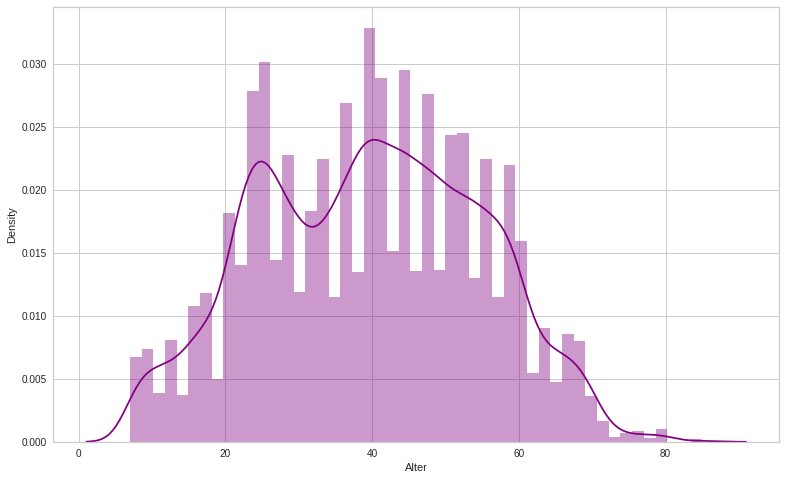

In [573]:
plt.figure(figsize=(13,8))
sns.distplot(data_ohneAusreisser.Alter, color='purple');

In [574]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y=data_ohneAusreisser['Alter'], notched=True, name='Alter', marker_color = '#6699ff', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 2)

fig.update_layout(title_text='Boxplot für das Alter')

fig.show()

###2.5.2 Flugdistanz

####2.5.2.1 Mit Ausreißer

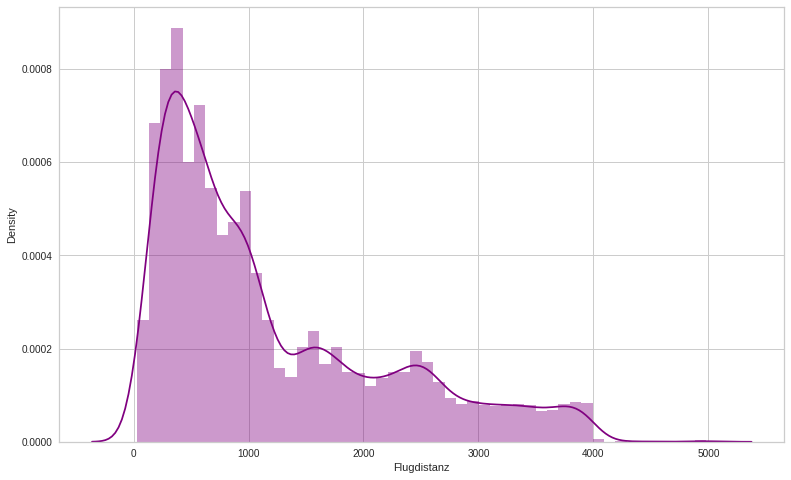

In [575]:
plt.figure(figsize=(13,8))
sns.distplot(data.Flugdistanz, color='purple');

In [576]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y=data['Flugdistanz'], notched=True, name='Flugdistanz', marker_color = '#6699ff', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 2)

fig.update_layout(title_text='Boxplot für die Flugdistanz')

fig.show()

####2.5.2.2 Ohne Ausreißer

In [577]:
data_ohneAusreisser.drop(data_ohneAusreisser[data_ohneAusreisser['Flugdistanz'] > 4000].index, inplace = True)

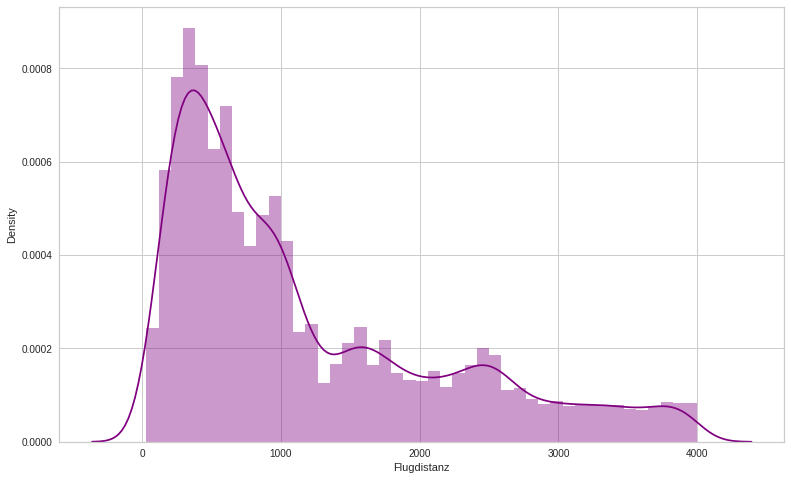

In [578]:
plt.figure(figsize=(13,8))
sns.distplot(data_ohneAusreisser.Flugdistanz, color='purple');

In [579]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y=data_ohneAusreisser['Flugdistanz'], notched=True, name='Flugdistanz', marker_color = '#6699ff', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 2)

fig.update_layout(title_text='Boxplot für die Flugdistanz ohne Ausreißer')

fig.show()

###2.5.3 Gesamtverspätung

####2.5.3.1 Mit Ausreißer

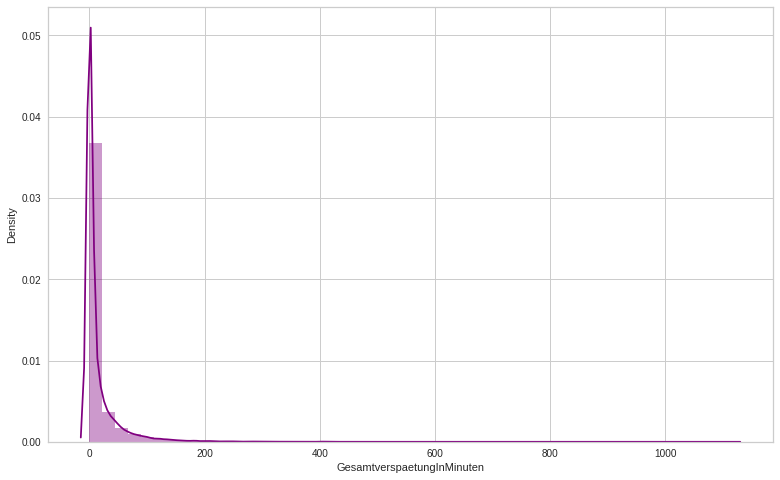

In [580]:
plt.figure(figsize=(13,8))
sns.distplot(data_ohneAusreisser['GesamtverspaetungInMinuten'], color='purple');

In [581]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y=data_ohneAusreisser['GesamtverspaetungInMinuten'], notched=True, name='GesamtverspaetungInMinuten', marker_color = '#6699ff', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 2)

fig.update_layout(title_text='Boxplot für die Gesamtverspätung mit Ausreißer')

fig.show()

####2.5.3.2 Ohne Ausreißer

In [582]:
data_ohneAusreisser.drop(data_ohneAusreisser[data_ohneAusreisser['GesamtverspaetungInMinuten'] > 300].index, inplace = True)

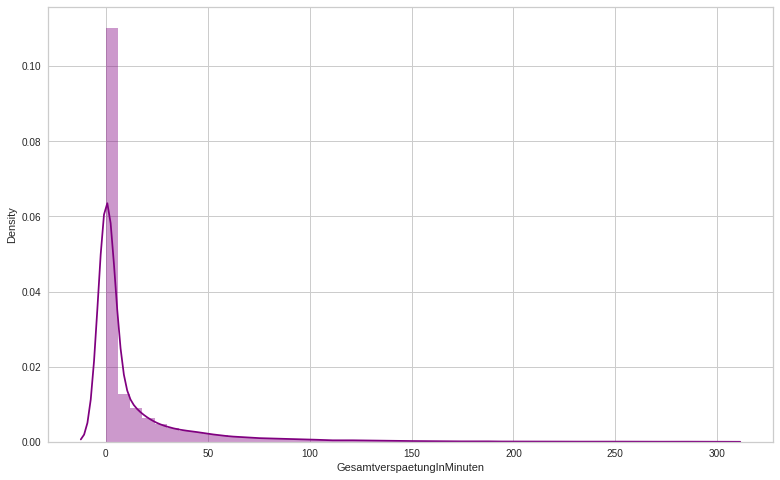

In [583]:
plt.figure(figsize=(13,8))
sns.distplot(data_ohneAusreisser['GesamtverspaetungInMinuten'], color='purple');

In [584]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y=data_ohneAusreisser['GesamtverspaetungInMinuten'], notched=True, name='GesamtverspaetungInMinuten', marker_color = '#6699ff', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 2)

fig.update_layout(title_text='Boxplot für die Gesamtverspätung ohne Ausreißer')

fig.show()

###2.5.4 Punkte Zufriedenheit summiert

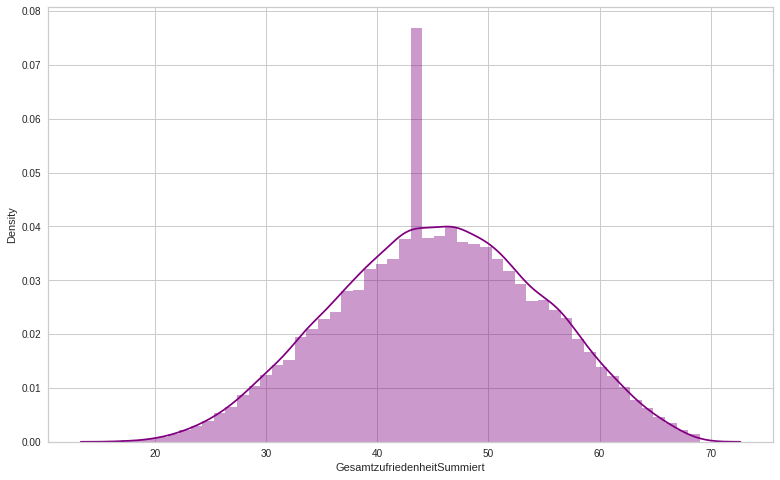

In [585]:
plt.figure(figsize=(13,8))
sns.distplot(data_ohneAusreisser['GesamtzufriedenheitSummiert'], color='purple');

In [586]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y=data_ohneAusreisser['GesamtzufriedenheitSummiert'], notched=True, name='GesamtzufriedenheitSummiert', marker_color = '#6699ff', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 2)

fig.update_layout(title_text='Boxplot für die Gesamtzufriedenheit summiert')

fig.show()

#3. Analyse

---

##3.1 Kategorienverteilung checken

In [587]:
categorical = [var for var in data_ohneAusreisser.columns if data_ohneAusreisser[var].dtype=='O']
categorical

['Geschlecht', 'PassagierTyp', 'Reisetyp', 'Klasse', 'IstZufrieden']

In [588]:
#prozentuale Verteilung der Spalten im Bezug zur Gesamtanzahl
for var in categorical:
    print(data_ohneAusreisser[var].value_counts() / np.float(len(data_ohneAusreisser)))
    print("\n\n")

Female    0.507224
Male      0.492776
Name: Geschlecht, dtype: float64



Loyal Customer       0.815122
disloyal Customer    0.184878
Name: PassagierTyp, dtype: float64



Business travel    0.694194
Personal Travel    0.305806
Name: Reisetyp, dtype: float64



Business    0.480885
Eco         0.445172
Eco Plus    0.073944
Name: Klasse, dtype: float64



neutral or dissatisfied    0.561219
satisfied                  0.438781
Name: IstZufrieden, dtype: float64





##3.2 Korrelation

Text(0.5, 1.0, 'Correlation Heatmap')

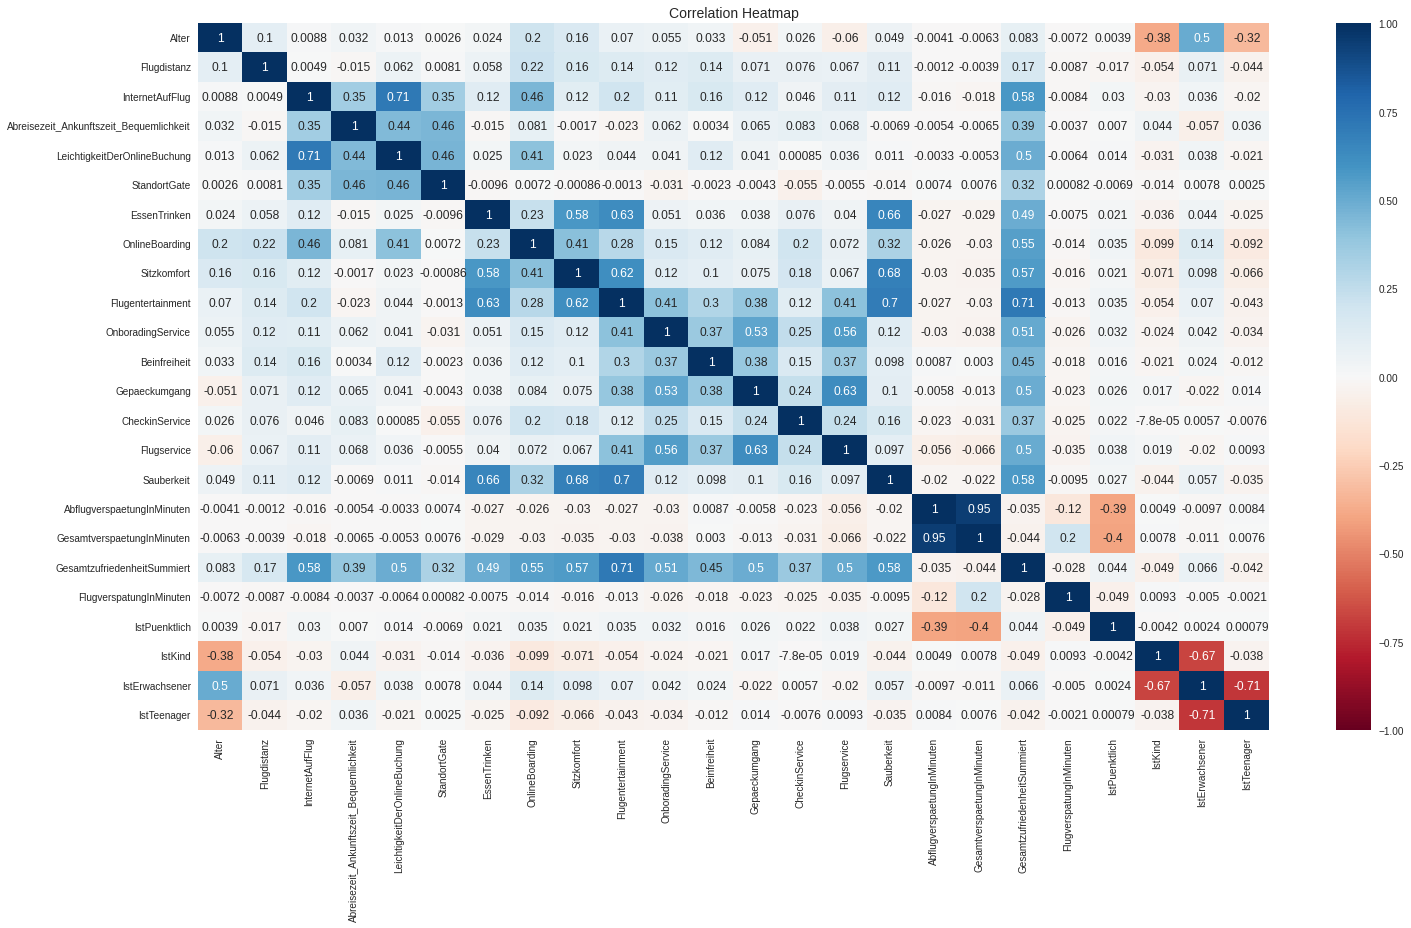

In [589]:
corrmat = data_ohneAusreisser.corr()

plt.figure(figsize=(24,13))  
sns.heatmap(corrmat, annot = True, cmap = 'RdBu', center = 0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap',fontsize=14)

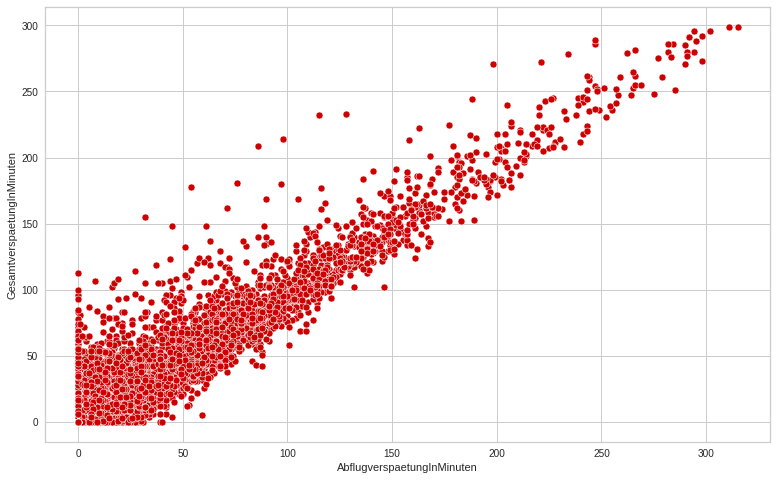

In [590]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=data_ohneAusreisser['AbflugverspaetungInMinuten'], y=data_ohneAusreisser['GesamtverspaetungInMinuten'], color='#cc0000');

#4. Clustern Vorbereitung

##4.1 Spalten numerisch machen

In [591]:
#datensatz umbenennen
data_numerisch = data_ohneAusreisser.copy()

In [592]:
data_numerisch['Geschlecht'] = data_numerisch['Geschlecht'].replace({'Female':0, 'Male':1})
data_numerisch['IstZufrieden'] = data_numerisch['IstZufrieden'].replace({'satisfied':1, 'neutral or dissatisfied':0})
data_numerisch['PassagierTyp'] = data_numerisch['PassagierTyp'].replace({'Loyal Customer':1, 'disloyal Customer':0})
data_numerisch['Klasse'] = data_numerisch['Klasse'].replace({'Business':0, 'Eco':1, 'Eco Plus':2})
data_numerisch['Reisetyp'] = data_numerisch['Reisetyp'].replace({'Business travel':0, 'Personal Travel':1})

In [593]:
data_numerisch.head()

,Geschlecht,PassagierTyp,Alter,Reisetyp,Klasse,Flugdistanz,InternetAufFlug,Abreisezeit_Ankunftszeit_Bequemlichkeit,LeichtigkeitDerOnlineBuchung,StandortGate,EssenTrinken,OnlineBoarding,Sitzkomfort,Flugentertainment,OnboradingService,Beinfreiheit,Gepaeckumgang,CheckinService,Flugservice,Sauberkeit,AbflugverspaetungInMinuten,GesamtverspaetungInMinuten,IstZufrieden,GesamtzufriedenheitSummiert,FlugverspatungInMinuten,IstPuenktlich,IstKind,IstErwachsener,IstTeenager
0,0,1,52,0,1,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,1,58,-6.0,0,0,1,0
1,0,1,36,0,0,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1,48,0.0,1,0,1,0
2,1,0,20,0,1,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0,30,0.0,1,0,1,0
3,1,1,44,0,0,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1,25,6.0,0,0,1,0
4,0,1,49,0,1,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1,37,20.0,0,0,1,0


In [594]:
data_numerisch.dtypes

Geschlecht                                   int64
PassagierTyp                                 int64
Alter                                        int64
Reisetyp                                     int64
Klasse                                       int64
Flugdistanz                                  int64
InternetAufFlug                              int64
Abreisezeit_Ankunftszeit_Bequemlichkeit      int64
LeichtigkeitDerOnlineBuchung                 int64
StandortGate                                 int64
EssenTrinken                                 int64
OnlineBoarding                               int64
Sitzkomfort                                  int64
Flugentertainment                            int64
OnboradingService                            int64
Beinfreiheit                                 int64
Gepaeckumgang                                int64
CheckinService                               int64
Flugservice                                  int64
Sauberkeit                     

##4.2 Nicht benötgite Spalten entfernen

In [595]:
#datensatz umbenennen
data_final = data_numerisch.copy()

In [596]:
data_final.head()

,Geschlecht,PassagierTyp,Alter,Reisetyp,Klasse,Flugdistanz,InternetAufFlug,Abreisezeit_Ankunftszeit_Bequemlichkeit,LeichtigkeitDerOnlineBuchung,StandortGate,EssenTrinken,OnlineBoarding,Sitzkomfort,Flugentertainment,OnboradingService,Beinfreiheit,Gepaeckumgang,CheckinService,Flugservice,Sauberkeit,AbflugverspaetungInMinuten,GesamtverspaetungInMinuten,IstZufrieden,GesamtzufriedenheitSummiert,FlugverspatungInMinuten,IstPuenktlich,IstKind,IstErwachsener,IstTeenager
0,0,1,52,0,1,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,1,58,-6.0,0,0,1,0
1,0,1,36,0,0,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1,48,0.0,1,0,1,0
2,1,0,20,0,1,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0,30,0.0,1,0,1,0
3,1,1,44,0,0,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1,25,6.0,0,0,1,0
4,0,1,49,0,1,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1,37,20.0,0,0,1,0


##4.3 Feature Scaling

In [597]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_final), columns = data_final.columns)

In [598]:
data_scaled.head()

,Geschlecht,PassagierTyp,Alter,Reisetyp,Klasse,Flugdistanz,InternetAufFlug,Abreisezeit_Ankunftszeit_Bequemlichkeit,LeichtigkeitDerOnlineBuchung,StandortGate,EssenTrinken,OnlineBoarding,Sitzkomfort,Flugentertainment,OnboradingService,Beinfreiheit,Gepaeckumgang,CheckinService,Flugservice,Sauberkeit,AbflugverspaetungInMinuten,GesamtverspaetungInMinuten,IstZufrieden,GesamtzufriedenheitSummiert,FlugverspatungInMinuten,IstPuenktlich,IstKind,IstErwachsener,IstTeenager
0,-0.985655,0.476246,0.817831,-0.663717,0.652274,-1.036761,1.706097,0.622391,0.172988,0.799152,-0.161446,0.544835,-0.340176,1.226703,1.259265,1.251196,1.162871,-1.035188,1.144134,1.299511,1.191267,0.965784,1.130948,1.360588,-0.656500,-0.946835,-0.189724,0.282174,-0.201466
1,-0.985655,0.476246,-0.239154,-0.663717,-0.950597,1.682308,-1.291066,-1.334369,0.172988,-1.542257,1.340280,0.544835,1.174539,0.479933,0.479264,0.493410,0.312899,-0.247245,0.296847,1.299511,-0.433077,-0.443409,1.130948,0.280885,-0.051799,1.056151,-0.189724,0.282174,-0.201466
2,1.014554,-2.099754,-1.296139,-0.663717,0.652274,-1.004571,-0.541775,-1.986622,-0.535006,0.799152,-0.912308,-0.930440,-1.097533,-1.013609,0.479264,-1.779946,-0.537072,-1.035188,-1.397726,-0.974105,-0.433077,-0.443409,-0.884214,-1.662581,-0.051799,1.056151,-0.189724,0.282174,-0.201466
3,1.014554,0.476246,0.289338,-0.663717,-0.950597,2.199364,-2.040357,-1.986622,-1.950993,-0.761787,-0.161446,0.544835,0.417181,-1.760379,-1.860739,-1.779946,-2.237014,-0.247245,-2.245013,0.541639,-0.433077,-0.251246,1.130948,-2.202432,0.552902,-0.946835,-0.189724,0.282174,-0.201466
4,-0.985655,0.476246,0.619646,-0.663717,0.652274,-0.008685,-0.541775,-0.029863,0.880981,0.018683,0.589417,-1.668077,-1.097533,-1.013609,-1.080738,-1.022161,-1.387043,0.540698,-1.397726,0.541639,-0.433077,0.197134,1.130948,-0.906789,1.963870,-0.946835,-0.189724,0.282174,-0.201466


##4.4 Dimensionsreduktion

###4.2.1 PCA mit 28 Features

Text(0, 0.5, 'Cumulative Explained Variance')

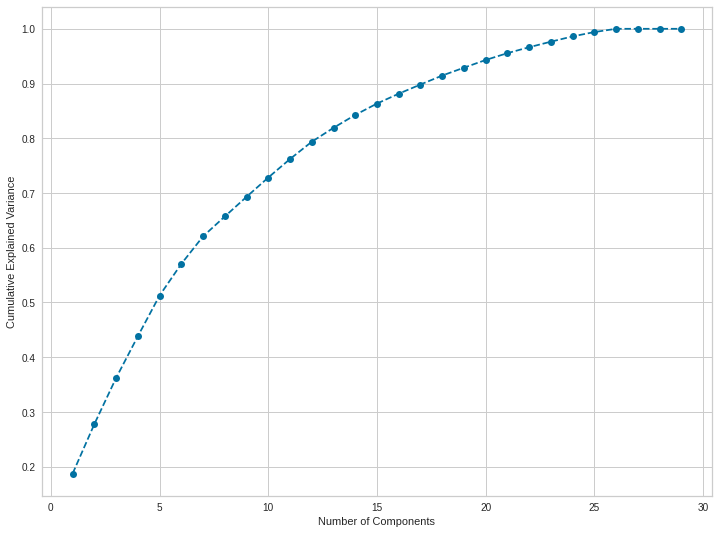

In [599]:
pca28 = PCA()
pca28.fit(data_scaled)

#50% meiner Features machen 80% meiner Varianz aus
plt.figure(figsize=(12, 9))
plt.plot(range(1, 30), pca28.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

###4.2.2 PCA mit 17 & 20 Features (90-95% meiner Varianz)

Text(0.5, 1.0, 'Correlation Heatmap')

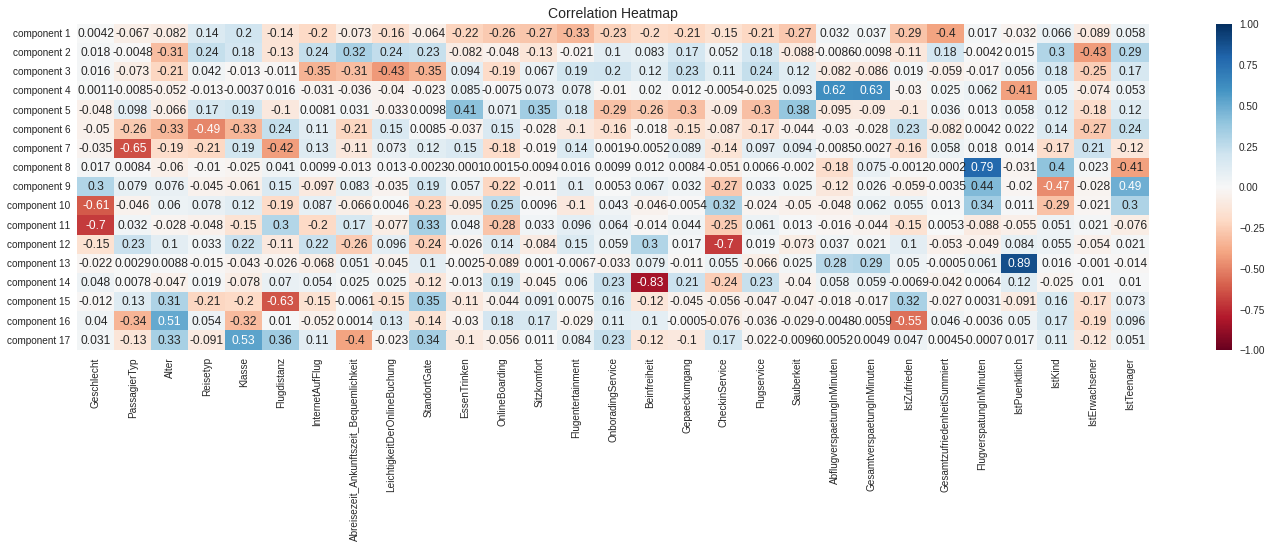

In [600]:
#17
pca17 = PCA(n_components=17)
pca17.fit(data_scaled)

df_pca17_components = pd.DataFrame(
    data=pca17.components_.round(4),
    columns=data_scaled.columns.values,
    index=['component 1', 'component 2', 'component 3', 'component 4', 'component 5', 'component 6', 'component 7', 'component 8', 'component 9', 'component 10', 'component 11', 'component 12','component 13', 'component 14', 'component 15', 'component 16', 'component 17'])

df_pca17_components
#------------------------------------------------------------------------------
plt.figure(figsize=(24,6))  
sns.heatmap(df_pca17_components, annot = True, cmap = 'RdBu', center = 0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap',fontsize=14)

Text(0.5, 1.0, 'Correlation Heatmap')

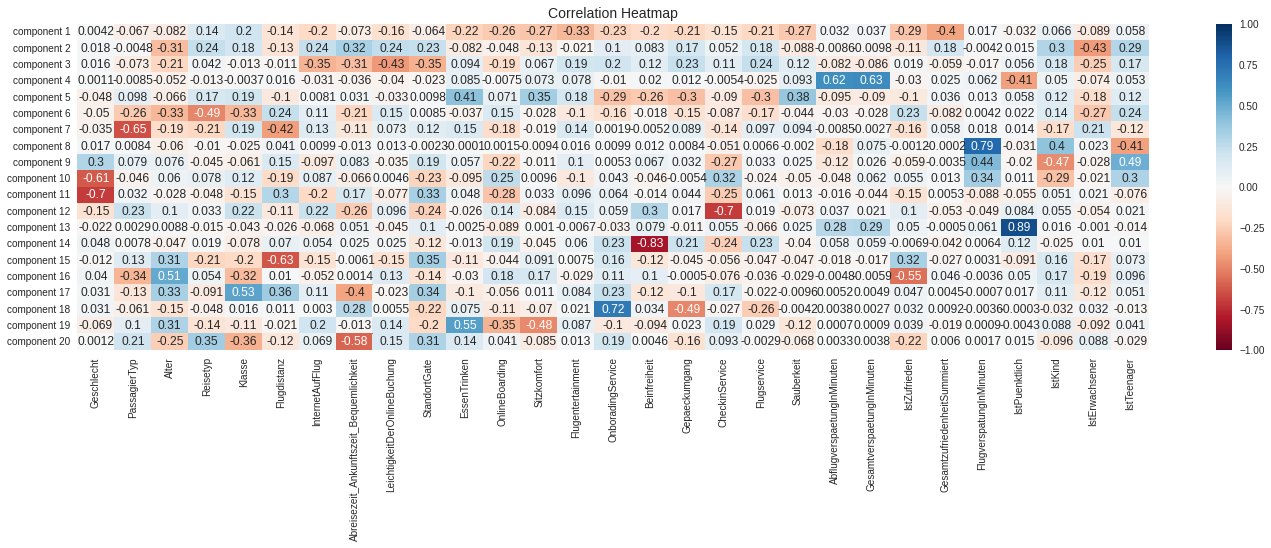

In [601]:
#20
pca20 = PCA(n_components=20)
pca20.fit(data_scaled)

df_pca20_components = pd.DataFrame(
    data=pca20.components_.round(4),
    columns=data_scaled.columns.values,
    index=['component 1', 'component 2', 'component 3', 'component 4', 'component 5', 'component 6', 'component 7', 'component 8', 'component 9', 'component 10', 'component 11', 'component 12','component 13', 'component 14', 'component 15', 'component 16', 'component 17', 'component 18', 'component 19', 'component 20'])

df_pca20_components
#------------------------------------------------------------------------------
plt.figure(figsize=(24,6))  
sns.heatmap(df_pca20_components, annot = True, cmap = 'RdBu', center = 0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap',fontsize=14)

###4.2.3 PCA mit 9-12 Features (70-80% meiner Varianz)

Text(0.5, 1.0, 'Correlation Heatmap')

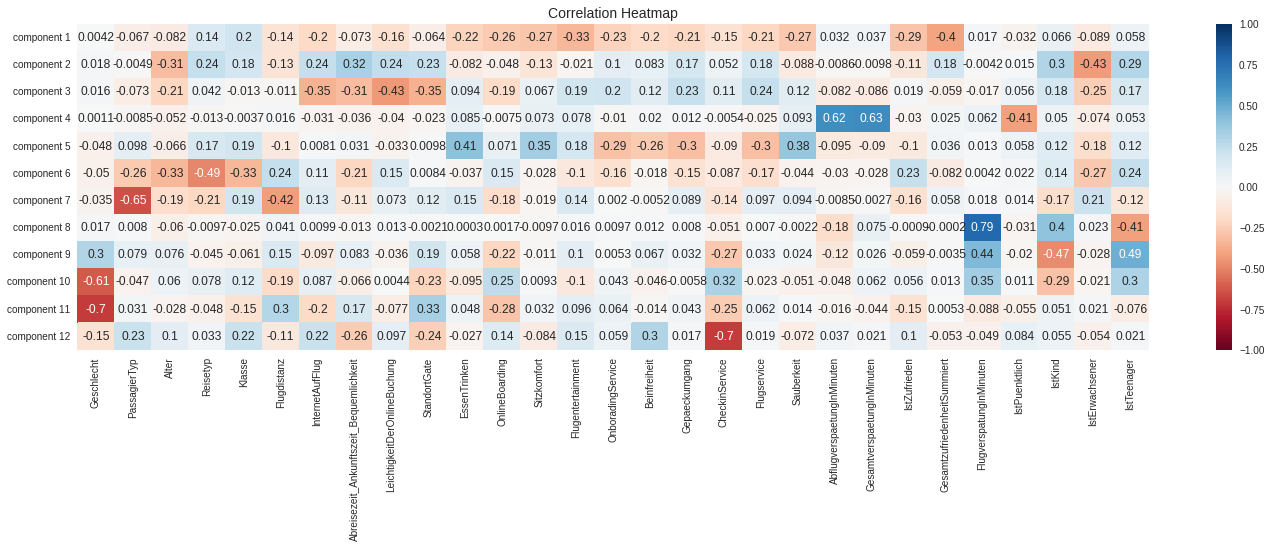

In [602]:
#12
pca12 = PCA(n_components=12)
pca12.fit(data_scaled)

df_pca12_components = pd.DataFrame(
    data=pca12.components_.round(4),
    columns=data_scaled.columns.values,
    index=['component 1', 'component 2', 'component 3', 'component 4', 'component 5', 'component 6', 'component 7', 'component 8', 'component 9', 'component 10', 'component 11', 'component 12'])

df_pca12_components
#------------------------------------------------------------------------------
plt.figure(figsize=(24,6))  
sns.heatmap(df_pca12_components, annot = True, cmap = 'RdBu', center = 0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap',fontsize=14)

Text(0.5, 1.0, 'Correlation Heatmap')

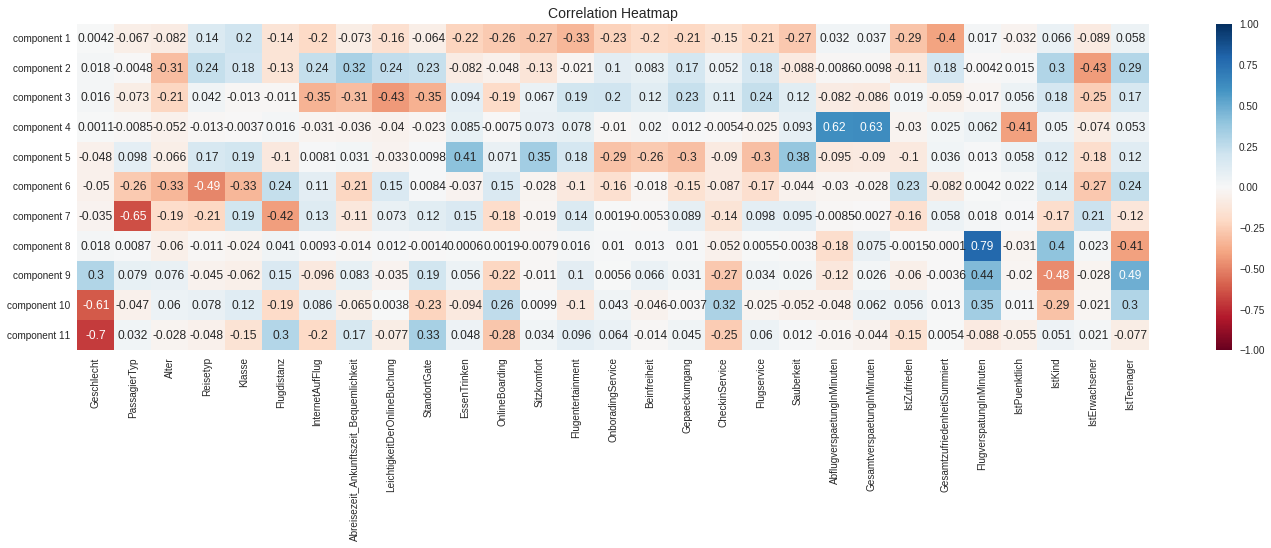

In [603]:
#11
pca11 = PCA(n_components=11)
pca11.fit(data_scaled)

df_pca11_components = pd.DataFrame(
    data=pca11.components_.round(4),
    columns=data_scaled.columns.values,
    index=['component 1', 'component 2', 'component 3', 'component 4', 'component 5', 'component 6', 'component 7', 'component 8', 'component 9', 'component 10', 'component 11'])

df_pca11_components
#------------------------------------------------------------------------------
plt.figure(figsize=(24,6))  
sns.heatmap(df_pca11_components, annot = True, cmap = 'RdBu', center = 0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap',fontsize=14)

Text(0.5, 1.0, 'Correlation Heatmap')

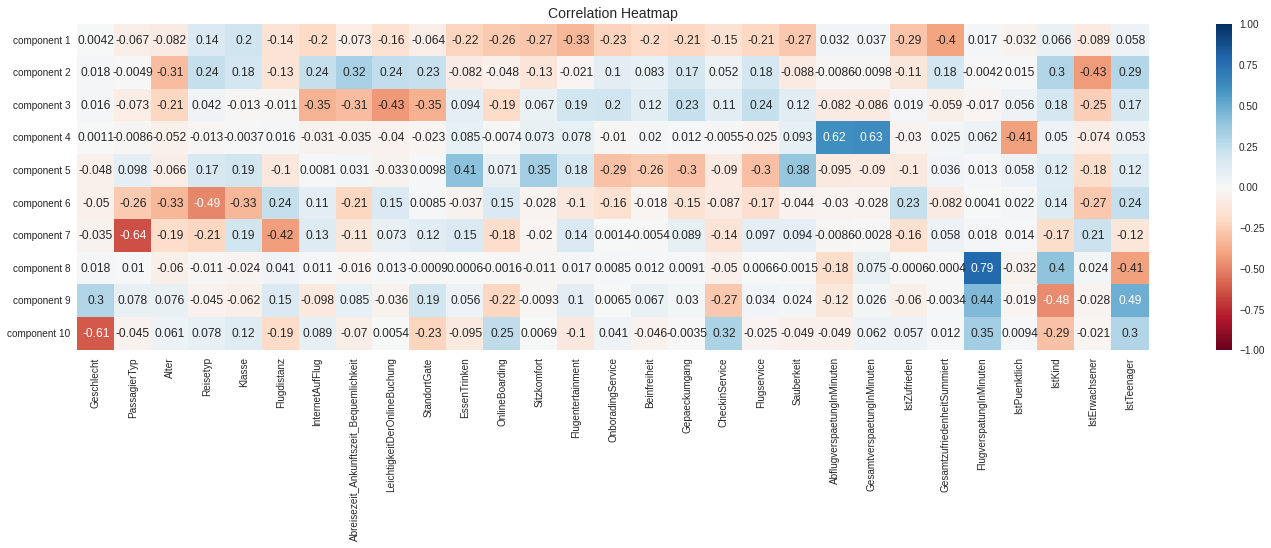

In [604]:
#10
pca10 = PCA(n_components=10)
pca10.fit(data_scaled)

df_pca10_components = pd.DataFrame(
    data=pca10.components_.round(4),
    columns=data_scaled.columns.values,
    index=['component 1', 'component 2', 'component 3', 'component 4', 'component 5', 'component 6', 'component 7', 'component 8', 'component 9', 'component 10'])

df_pca10_components
#------------------------------------------------------------------------------
plt.figure(figsize=(24,6))  
sns.heatmap(df_pca10_components, annot = True, cmap = 'RdBu', center = 0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap',fontsize=14)

Text(0.5, 1.0, 'Correlation Heatmap')

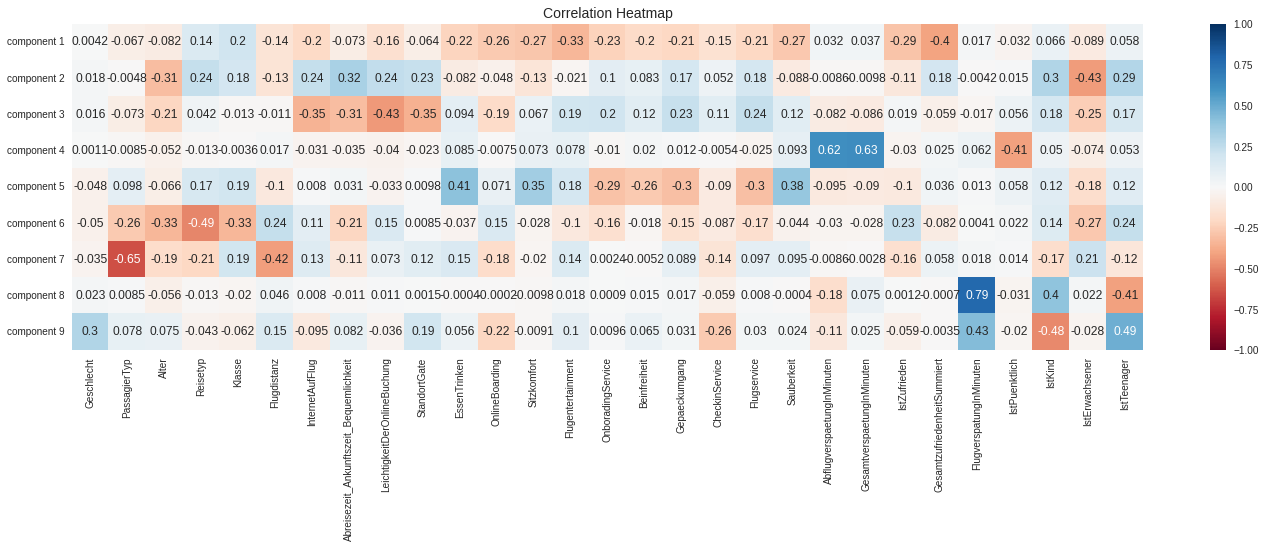

In [605]:
#9
pca9 = PCA(n_components=9)
pca9.fit(data_scaled)

df_pca9_components = pd.DataFrame(
    data=pca9.components_.round(4),
    columns=data_scaled.columns.values,
    index=['component 1', 'component 2', 'component 3', 'component 4', 'component 5', 'component 6', 'component 7', 'component 8', 'component 9'])

df_pca9_components
#------------------------------------------------------------------------------
plt.figure(figsize=(24,6))  
sns.heatmap(df_pca9_components, annot = True, cmap = 'RdBu', center = 0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap',fontsize=14)

#5. Clustern mit K-Means

---

##4.1 Elbow method

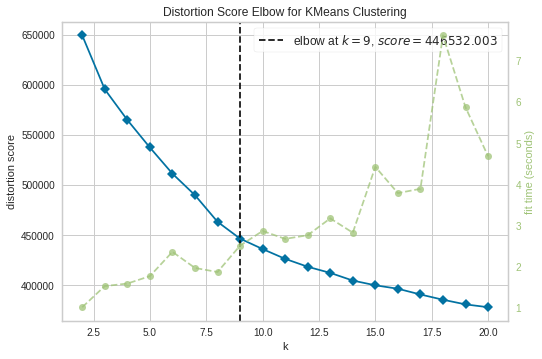

In [606]:
#20 Komponenten = 95% meiner Varianz
Elbow_M = KElbowVisualizer(KMeans(), k=20)
Elbow_M.fit(data_scaled)
Elbow_M.show();

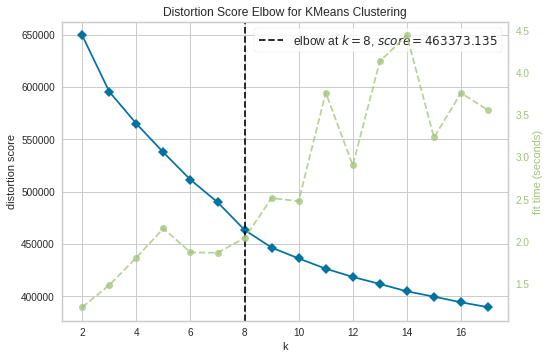

In [607]:
#17 Komponenten = 90% meiner Varianz
Elbow_M = KElbowVisualizer(KMeans(), k=17)
Elbow_M.fit(data_scaled)
Elbow_M.show();

##4.2 K-Means

In [608]:
kmeans = KMeans(n_clusters=8, init='k-means++', random_state=42)
df = kmeans.fit_transform(data_scaled)

In [609]:
data_kmeans = data_scaled.copy()
data_kmeans['Clusters'] = kmeans.labels_

In [610]:
data_analysis = data_kmeans.groupby('Clusters').mean().round(3)
data_analysis

,Geschlecht,PassagierTyp,Alter,Reisetyp,Klasse,Flugdistanz,InternetAufFlug,Abreisezeit_Ankunftszeit_Bequemlichkeit,LeichtigkeitDerOnlineBuchung,StandortGate,EssenTrinken,OnlineBoarding,Sitzkomfort,Flugentertainment,OnboradingService,Beinfreiheit,Gepaeckumgang,CheckinService,Flugservice,Sauberkeit,AbflugverspaetungInMinuten,GesamtverspaetungInMinuten,IstZufrieden,GesamtzufriedenheitSummiert,FlugverspatungInMinuten,IstPuenktlich,IstKind,IstErwachsener,IstTeenager
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.010,0.409,0.307,-0.659,-0.826,0.655,-0.787,-0.972,-0.797,-1.051,0.308,0.581,0.548,0.699,0.610,0.575,0.503,0.343,0.495,0.460,-0.175,-0.191,1.058,0.173,-0.056,0.066,-0.190,0.282,-0.201
1,0.034,0.181,-1.984,1.075,0.629,-0.285,-0.157,0.230,-0.164,-0.072,-0.187,-0.526,-0.375,-0.286,-0.127,-0.109,0.086,0.000,0.106,-0.232,-0.034,-0.024,-0.614,-0.260,0.031,-0.016,5.271,-3.544,-0.201
2,0.001,-0.239,0.048,0.704,0.662,-0.465,-0.148,0.134,-0.229,-0.010,0.595,-0.385,0.377,0.586,0.058,-0.198,0.143,-0.026,0.204,0.558,-0.180,-0.163,-0.724,0.232,0.046,0.041,-0.190,0.282,-0.201
3,-0.202,0.338,0.511,-0.004,-0.015,0.051,-0.250,-0.069,-0.049,-0.054,-0.056,0.050,-0.035,-0.762,-1.070,-0.846,-1.292,-0.452,-1.310,-0.227,-0.144,-0.128,-0.465,-0.872,0.042,-0.030,-0.190,0.282,-0.201
4,0.001,-0.058,-1.611,0.621,0.501,-0.217,-0.102,0.177,-0.108,0.013,-0.124,-0.458,-0.328,-0.214,-0.172,-0.065,0.066,-0.037,0.055,-0.177,-0.053,-0.052,-0.430,-0.210,-0.001,0.017,-0.190,-3.544,4.964
5,0.053,-0.050,0.085,-0.057,0.047,-0.029,0.013,-0.056,0.022,0.016,-0.084,-0.065,-0.101,-0.060,-0.117,0.043,-0.046,-0.122,-0.261,-0.032,3.747,3.736,-0.195,-0.117,0.132,-0.920,-0.148,0.201,-0.132
6,0.171,-0.591,-0.266,0.124,0.425,-0.390,-0.302,-0.132,-0.179,-0.025,-1.117,-0.737,-1.222,-1.152,-0.132,-0.088,0.025,-0.170,0.035,-1.188,-0.144,-0.148,-0.592,-0.921,-0.017,-0.001,-0.190,0.282,-0.201
7,-0.021,0.199,0.203,-0.565,-0.599,0.374,1.076,0.580,0.906,0.714,0.342,0.728,0.523,0.668,0.520,0.515,0.452,0.304,0.447,0.467,-0.183,-0.196,1.005,1.183,-0.050,0.113,-0.190,0.282,-0.201


In [611]:
#predict the labels of clusters.
labels = kmeans.fit_predict(data_scaled)
print(label)

#Getting unique labels
u_labels = np.unique(labels)
print(u_labels)

[2 5 1 ... 7 7 6]
[0 1 2 3 4 5 6 7]


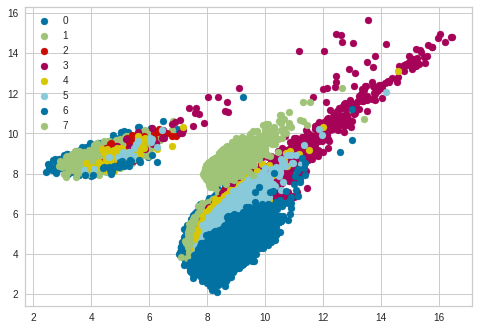

In [614]:
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 1] , df[label == i , 3] , label = i)
plt.legend()
plt.show()

#6. Hierarchical Clustering

---